### Import library functions

In [6]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

### Load data and remove unnecessary columns

In [22]:
df=pd.read_csv("train.csv")
df=df.drop(columns='Id')
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


#### Add additional columns

In [33]:
df['Age']=2019-df['YearBuilt']

### Remove outliers

In [11]:
def removeOutliers(df,column_name,percentile,cap):
    q=df[column_name].quantile(percentile)
    df[column_name]=df[column_name].clip(None,q)

#### Box plot to visualize outliers

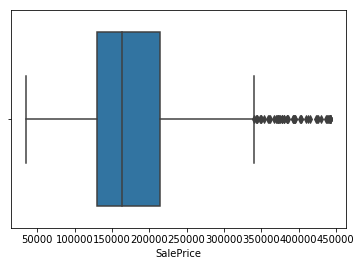

In [18]:
sns.boxplot(df['SalePrice'])

#### Calculate z score to check for outliers

In [16]:
z = np.abs(stats.zscore(df['SalePrice']))
print(z)
print(df['SalePrice'].quantile(0.99))

[0.34727322 0.00728832 0.53615372 ... 1.07761115 0.48852299 0.42084081]
442567.0100000005


In [23]:
removeOutliers(df,'SalePrice',0.99, 0)

### Visualize with seaborn correlation of features

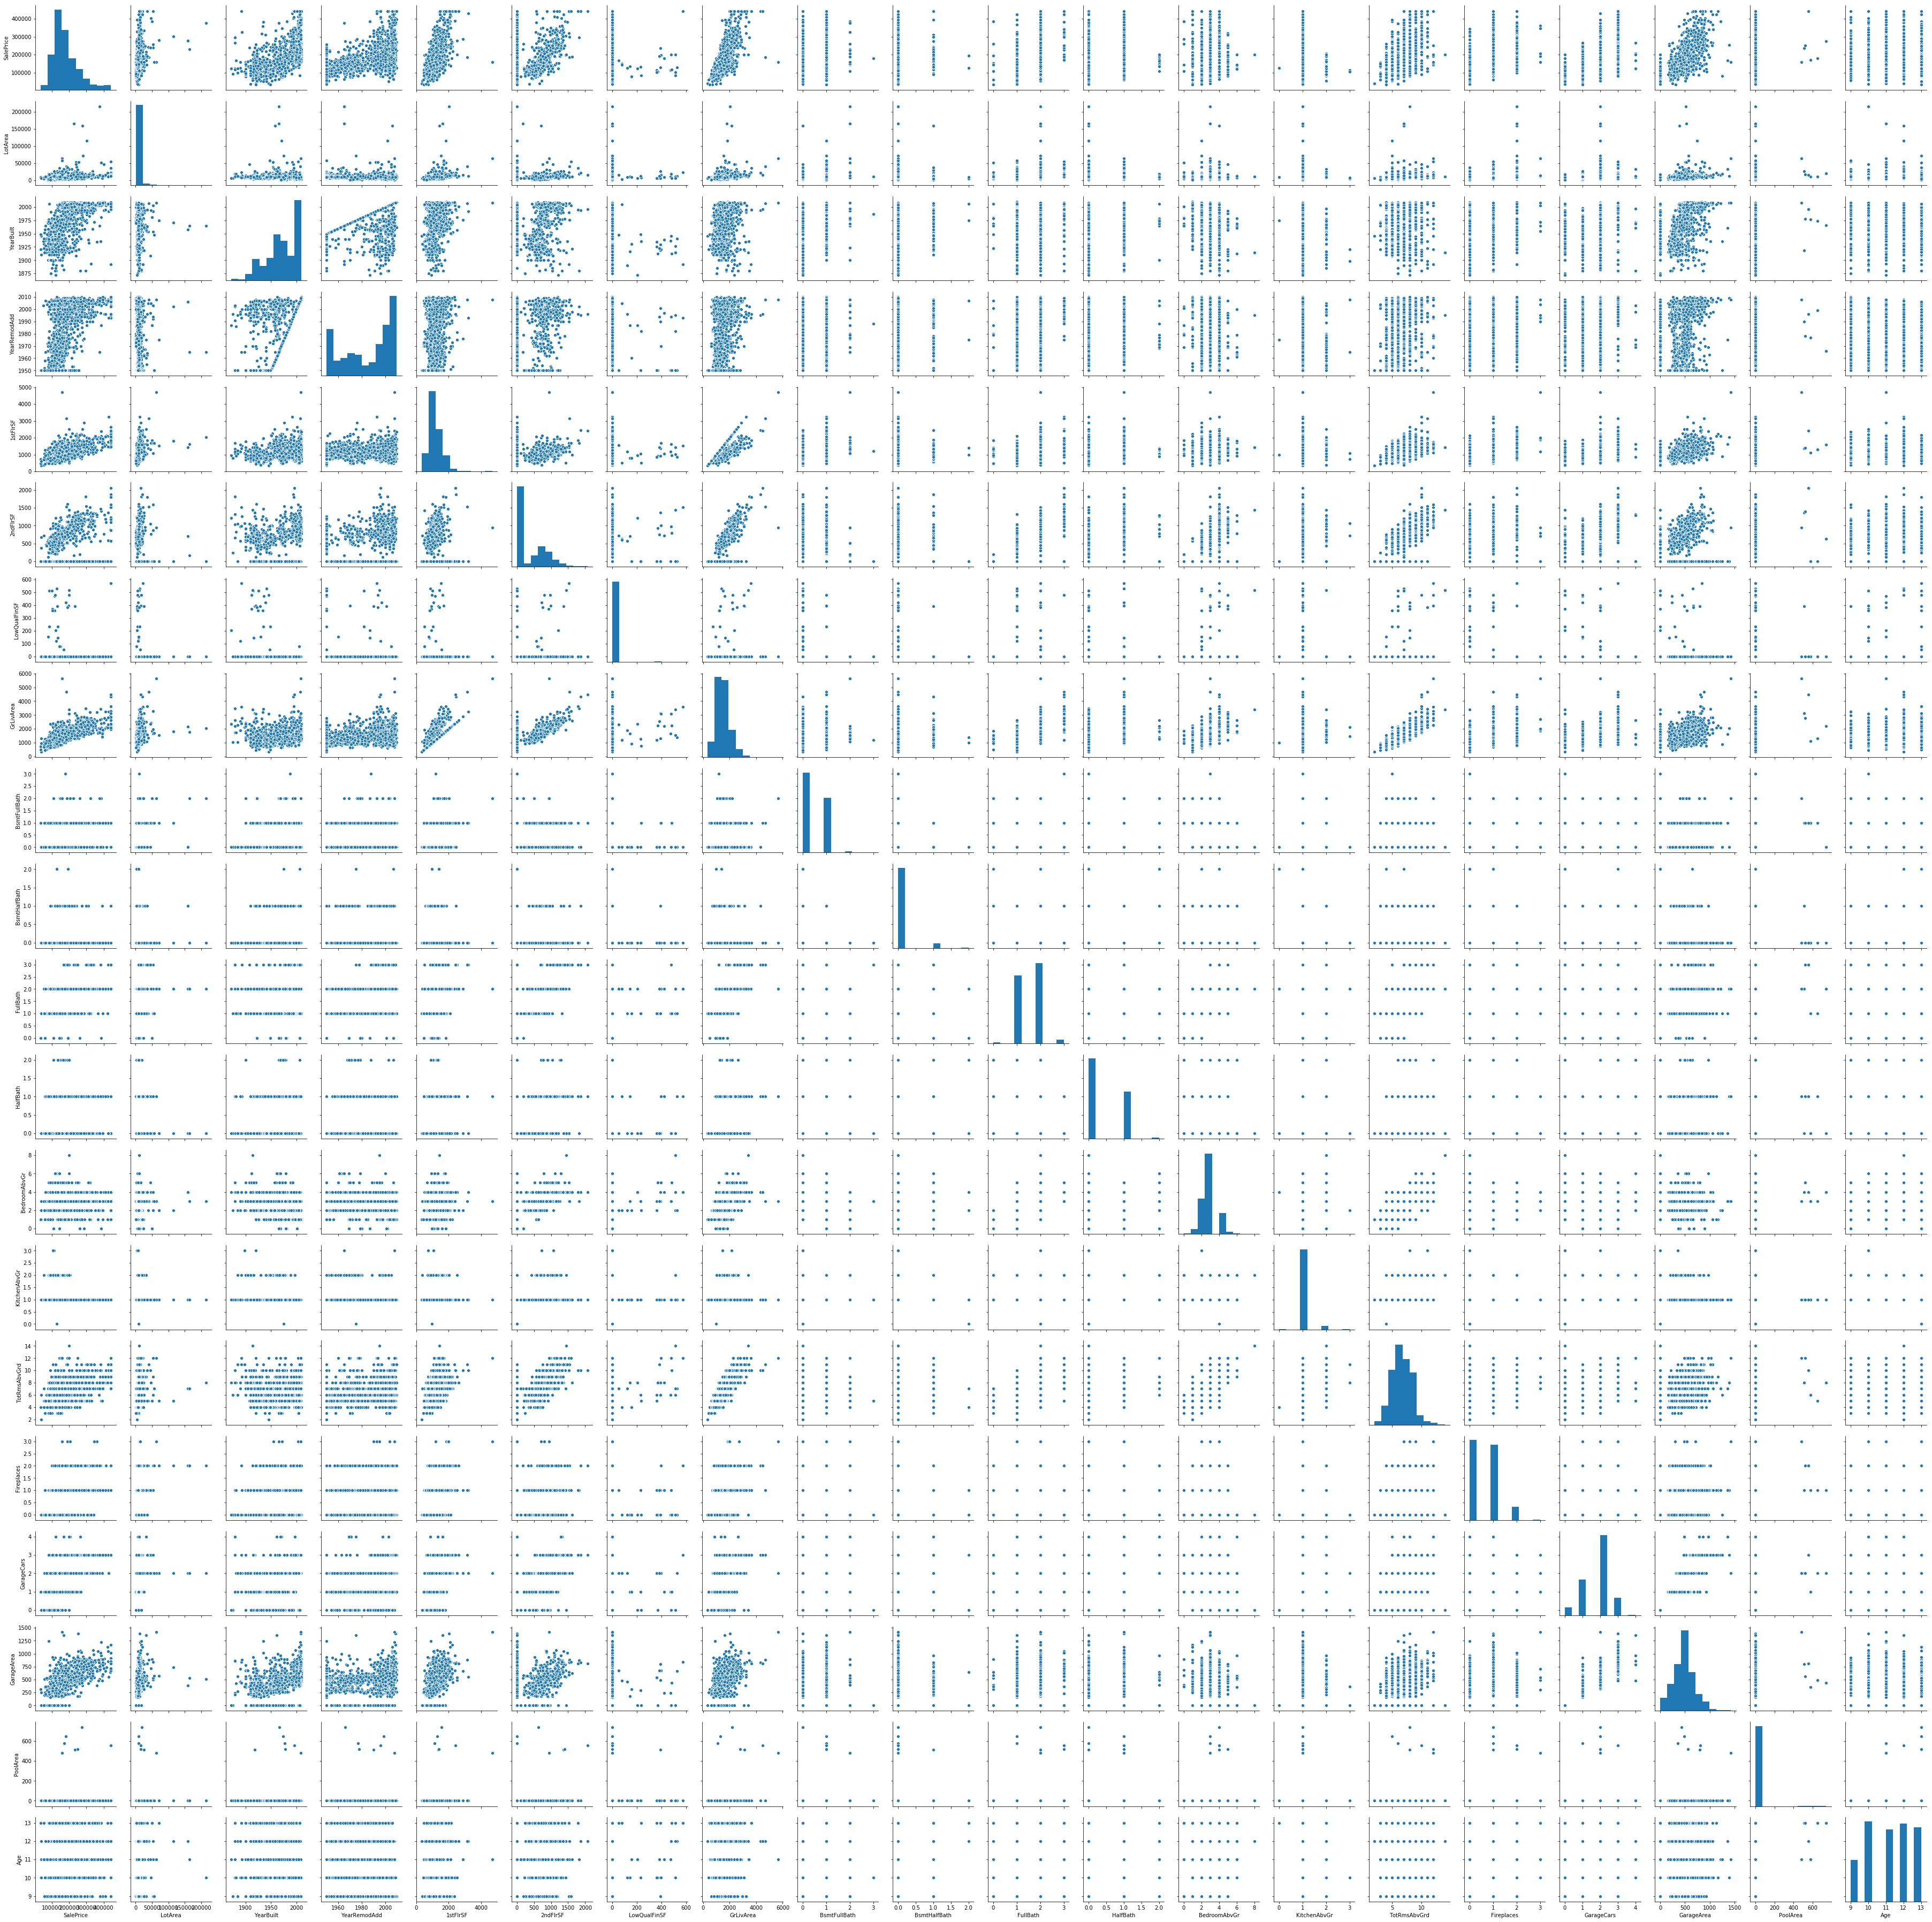

In [31]:
featureList=['SalePrice','YearBuilt','YearRemodAdd','1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr',
             'TotRmsAbvGrd','Fireplaces','GarageCars', 'GarageArea']
sns_pp=sns.pairplot(df[featureList])
sns_pp.savefig("sns_pp.png")

In [26]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [30]:
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,11
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,12
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,11


## Create a Linear Regression Model
#### Since output variable is continuous, we need to go for regression model
#### Linear Regression, Regression  Trees, Neural Nets
#### Linear Regression is very easy and fast to train, but non-linear relationships are difficult to find

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

featureList=['GrLivArea','1stFlrSF', '2ndFlrSF','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr'
            ,'TotRmsAbvGrd','Fireplaces','GarageCars', 'GarageArea','YearRemodAdd','YearBuilt']
#'1stFlrSF', '2ndFlrSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr',
#             'TotRmsAbvGrd','Fireplaces','GarageCars', 'GarageArea','YearRemodAdd'
X=df[featureList]
y=df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
#### Fit into model
clf = LinearRegression().fit(X_train, y_train)
clf.score(X_train, y_train)

0.7651788050926698

In [62]:
y_pred=clf.predict(X_test)
# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 2.39220490e+01  4.59831354e+01  2.29592883e+01  1.39684458e+04
  2.06298790e+03  4.03788504e+03  3.24060627e+01 -9.95901291e+03
 -4.30409354e+04  7.35295828e+03  1.10943658e+04  1.46595648e+04
  1.67695473e+01  4.71298243e+02  4.09588278e+02]
Mean squared error: 1062394565.66
Variance score: 0.82


## Regression Trees like Random Forest, xg-boost, decision trees